#  MOVIE RECOMMENDATION SYSTEM 

####  Introduction: 

Technology has become a huge part of our lives and has enabled us to do more things with ease and convenience than we could without technology. We’re able to communicate with people around the world, learn new skills, and share information in ways that were previously unimaginable.

In today’s technology-driven society, technology is being used to enhance convenience for people. Not only that, but technology has also enabled an increase in productivity and helped to reduce the amount of time spent on mundane tasks (Dutta, 2021).

####  Problem Statement: 

In light of the world rapidly moving toward convenience, it is the objective of this project to construct a movie recommendation algorithm based on content and/or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences. This will aid in increasing user satisfaction, convenience, sales as well as may contribute to increased loyalty. 


####  Data Overview: 

The dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. 


####  Data Description: 

* genome_scores.csv - a score mapping the strength between movies and tag-related properties. 

* genome_tags.csv - user assigned tags for genome-related scores.

* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.

* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.

* sample_submission.csv - Sample of the submission format for the hackathon.

* tags.csv - User assigned for the movies within the dataset.

* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.

* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.


<img src = 'https://media.tenor.com/HKpAobwCaGIAAAAd/countdown-movie-countdown.gif'></img>

<a id="cont"></a>

## Table Of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Pre-Processing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Conclusion</a>


 <a id="one"></a>
## 1. Importing Packages 
<a href=#cont>Back to Table of Contents</a>

In [1]:
!pip install scikit-surprise

In [2]:

# Libraries for data loading, data manipulation and data visulisation
## Numpy and Pandas
import numpy as np
import pandas as pd

## Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pip install wordcloud 
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# Libraries for data preparation and model building
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV




Note: you may need to restart the kernel to use updated packages.


<a id="two"></a>
## 2. Loading the data 
<a class="anchor" id="2"></a>
<a href=#cont>Back to Table of Contents</a>


In [3]:
# Load the given data

# Train data: 

df_train = pd.read_csv("train.csv")

df_gscores = pd.read_csv("genome_scores.csv")
df_gtags = pd.read_csv("genome_tags.csv")
df_imdb = pd.read_csv("imdb_data.csv")
df_links = pd.read_csv("links.csv")
df_movies = pd.read_csv("movies.csv")
df_tags = pd.read_csv("tags.csv")


## Test data: 
df_test = pd.read_csv("test.csv")

<a id="three"></a>
## 3. Data Pre-processing 
<a class="anchor" id="3"></a>
<a href=#cont>Back to Table of Contents</a>

In [4]:
# look at the dataframes

# Display the first 5 entries in each dataframe with headings

display("movies", df_movies.head())
display("imdb", df_imdb.head())
display("tags", df_tags.head())
display("train", df_train.head())
display("test", df_test.head())
display("genome scores", df_gscores.head())
display("genome tags", df_gtags.head())
display("links", df_links.head())


'movies'

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


'imdb'

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


'tags'

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


'train'

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


'test'

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


'genome scores'

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


'genome tags'

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


'links'

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0



---

__Observation and Interpretation:__



* Initial observation of the dataframes given indicate that not all information provided is relevant/useful for the purpose of the project - Therefore only relevant dataframes will be used.

* Due to the nature of the dataframes, some may be merged with others in order to appropriately conduct Exploratory Data Analysis.

* For content based filtering, the following dataframes seem to provide relevant information: userID, movieID, genre, cast, director and plotkeywords.

* For collaborative based filtering, the following dataframes seem to provide relevant information: userID, movieID, rating.

---

In [5]:
# Display the shape of the dataframes

shape = {'Genome scores': df_gscores.shape,
            'Genome tags': df_gtags.shape,
            'IMDB': df_imdb.shape,
            'Links': df_links.shape,
            "Movies": df_movies.shape,
            'Tags': df_tags.shape,
            'Train': df_train.shape,
            'Test': df_test.shape}

df_shape = pd.DataFrame(list(shape.items()), columns=['Dataframe', 'Shape'])
df_shape

,Dataframe,Shape
0,Genome scores,"(15584448, 3)"
1,Genome tags,"(1128, 2)"
2,IMDB,"(27278, 6)"
3,Links,"(62423, 3)"
4,Movies,"(62423, 3)"
5,Tags,"(1093360, 4)"
6,Train,"(10000038, 4)"
7,Test,"(5000019, 2)"



---

__Observation and Interpretation:__


* The dataframes provided are fairly large and may need to be carefully reduced in the Data Engineering phase of the project in order for shorter runtime and more efficient modeling. 


---

In [6]:
# Check for null values 

display("movies", df_movies.isnull().sum())
display("imdb", df_imdb.isnull().sum())
display("tags", df_tags.isnull().sum())
display("train", df_train.isnull().sum())
display("test", df_test.isnull().sum())
display("genome scores", df_gscores.isnull().sum())
display("genome tags", df_gtags.isnull().sum())
display("links", df_links.isnull().sum())

'movies'

movieId    0
title      0
genres     0
dtype: int64

'imdb'

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

'tags'

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

'train'

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

'test'

userId     0
movieId    0
dtype: int64

'genome scores'

movieId      0
tagId        0
relevance    0
dtype: int64

'genome tags'

tagId    0
tag      0
dtype: int64

'links'

movieId      0
imdbId       0
tmdbId     107
dtype: int64


---

__Observation and Interpretation:__



* The imdb, tags and links dataframes consist of null values - These however may not require imputation/deletion due to the nature of the project and data given. 


---

In [7]:
# Display the min and max ratings received
display("lowest rating", df_train.rating.min())
display("highest rating", df_train.rating.max())


'lowest rating'

0.5

'highest rating'

5.0


---

__Observation and Interpretation:__



* The lowest rating a movie received is 0.5 and the highest rating is 5.

---

#### MERGING DATASETS

In [8]:
# Merging datasets for EDA process 

# Creating a dataframe that merges all the features that may be useful
df_merge = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
df_merge = df_merge.merge(df_movies[['movieId', 'genres', 'title']], on='movieId', how='inner')

#Add colummn for release year
df_merge['year'] = df_merge['title'].str.extract(r"\((\d+)\)", expand=False)
df_merge.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),1995
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995),1995
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995),1995
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995),1995
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995),1995



---

__Observation and Interpretation:__



* Relevant features from the Imdb and movies dataframes have been merged for the EDA process.
* The year for each movie has been extracted and added to the dataframe in order to conduct appropriate EDA.

---

#### PREPARING FEATURES FOR EDA

In [9]:
df_merge.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),1995
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995),1995
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995),1995
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995),1995
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995),1995


In [10]:
# Convert data types to strings for string handling

df_merge['title_cast'] = df_merge.title_cast.astype(str)
df_merge['plot_keywords'] = df_merge.plot_keywords.astype(str)
df_merge['genres'] = df_merge.genres.astype(str)
df_merge['director'] = df_merge.director.astype(str)

In [11]:
# Removing spaces between director and cast names and convert to lowercase 

df_merge['director'] = df_merge['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df_merge['title_cast'] = df_merge['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))
df_merge['plot_keywords'] = df_merge['plot_keywords'].apply(lambda x: "".join(x.lower() for x in x.split()))
df_merge['title'] = df_merge['title'].apply(lambda x: "".join(x.lower() for x in x.split()))

In [12]:
# Discarding the pipes between the casts full names and extracting only the first three names

df_merge['title_cast'] = df_merge['title_cast'].map(lambda x: x.split('|')[:3])

In [13]:
# Discarding the pipes between the plot keywords' and extracting only the first five words

df_merge['plot_keywords'] = df_merge['plot_keywords'].map(lambda x: x.split('|')[:5])
df_merge['plot_keywords'] = df_merge['plot_keywords'].apply(lambda x: " ".join(x))

In [14]:
# Discarding the pipes between the genres and convert to lowercase
 
df_merge['genres'] = df_merge['genres'].map(lambda x: x.lower().split('|'))
df_merge['genres'] = df_merge['genres'].apply(lambda x: " ".join(x))

In [15]:
# removing punctuation from title cast 
import string


def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])


df_merge['title_cast'] = df_merge['title_cast'].apply(remove_punctuation)

In [16]:
df_merge.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,tomhankstimallendonrickles,johnlasseter,toy rivalry cowboy cgianimation,adventure animation children comedy fantasy,toystory(1995),1995
1,2,robinwilliamsjonathanhydekirstendunst,jonathanhensleigh,boardgame adventurer fight game,adventure children fantasy,jumanji(1995),1995
2,3,waltermatthaujacklemmonsophialoren,markstevenjohnson,boat lake neighbor rivalry,comedy romance,grumpieroldmen(1995),1995
3,4,whitneyhoustonangelabassettlorettadevine,terrymcmillan,blackamerican husbandwiferelationship betrayal...,comedy drama romance,waitingtoexhale(1995),1995
4,5,stevemartindianekeatonmartinshort,alberthackett,fatherhood doberman dog mansion,comedy,fatherofthebridepartii(1995),1995



---

__Observation and Interpretation:__



* Data types have been converted to strings for easier handling. 
* The director and title cast features have been converted to lowercase and the name and surname have been merged.
* The pipes between the title cast feature have been removed and only the first 3 names have been extracted.
* The pipes between the plot keyword feature have been removed and only the first 5 words have been extracted.
* The pipes between the genre feature have been removed and have further been converted to lowercase.


---

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="4"></a>
<a href=#cont>Back to Table of Contents</a>


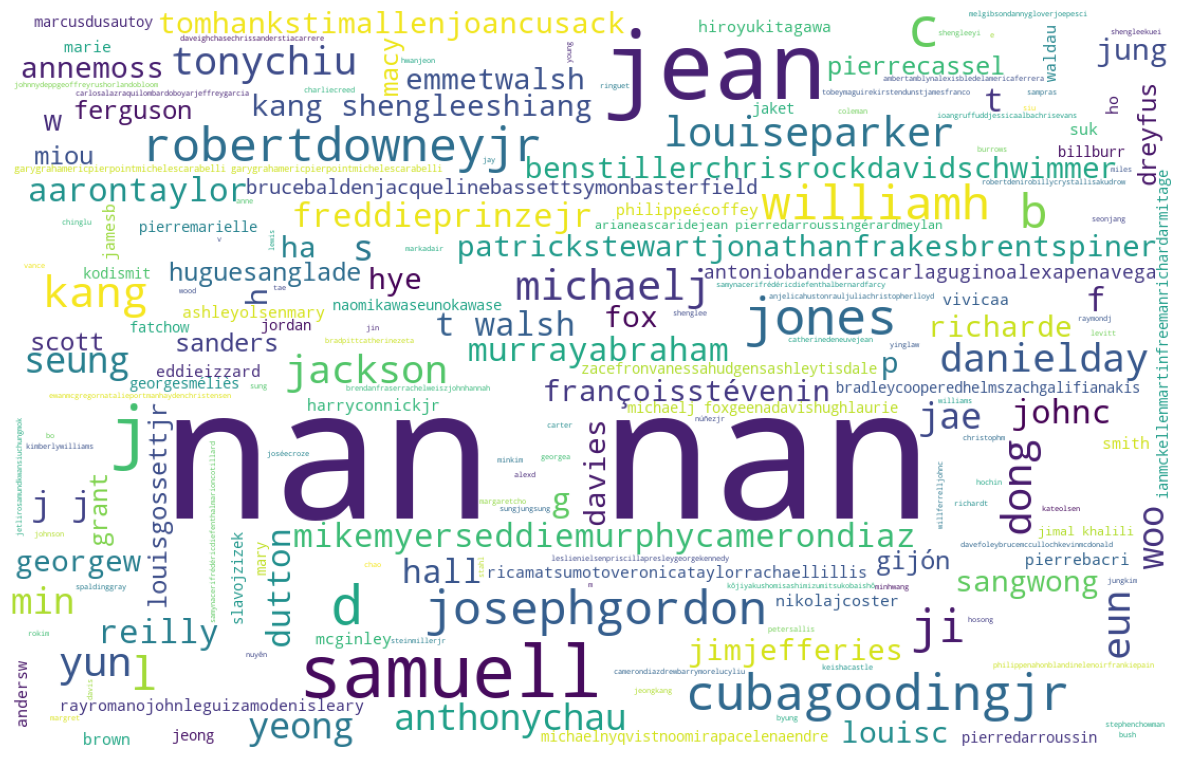

In [17]:
# Create a wordcloud for title cast
allwords = ' '.join( [ title for title in df_merge['title_cast']])

wordCloud = WordCloud(background_color= 'White', width=1100, height=700,random_state=42).generate(allwords)
plt.figure( figsize=(15,10) )
plt.axis('off')
plt.imshow(wordCloud)


---

__Observation and Interpretation:__



* There are many nan values within the dataset
* Famous actors such as Samuel L Jackson and Robert Downey jr, etc. appear quite often. This is most likely due to the actors/actresses acting in the most watched movies



---

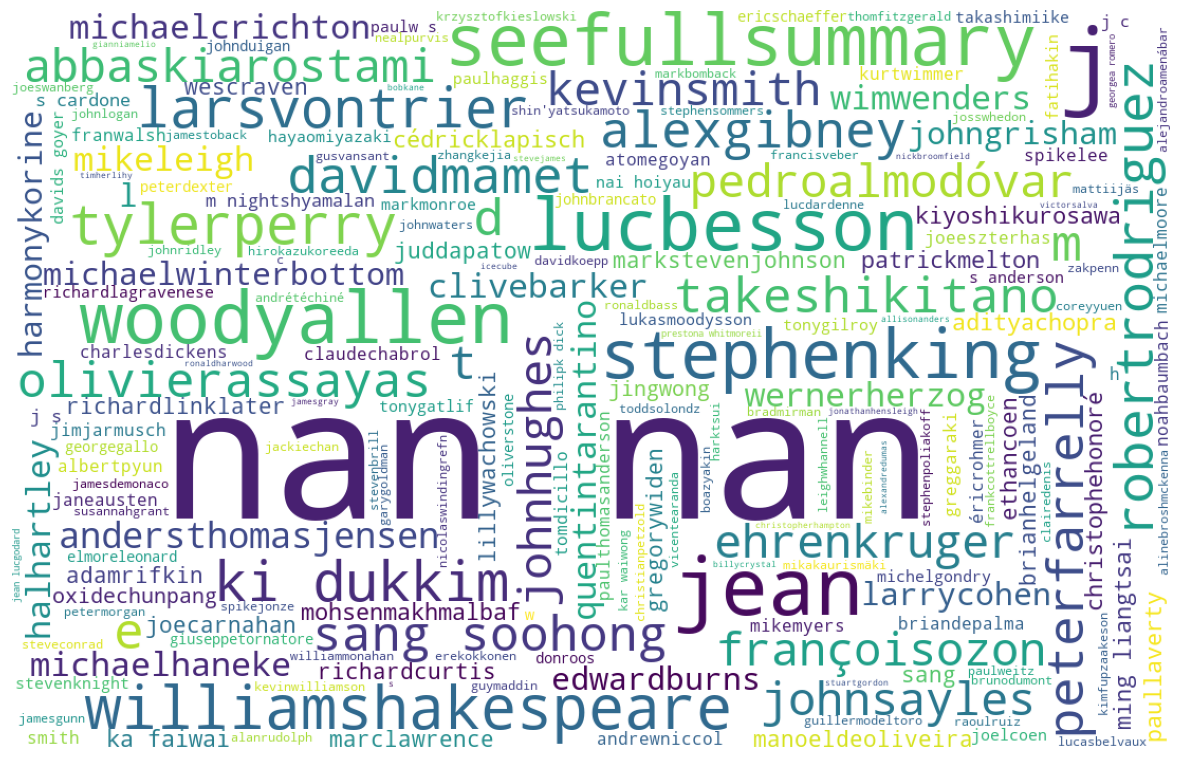

In [18]:
# create a word cloud for 'director'

allwords = ' '.join( [ title for title in df_merge['director']])

wordCloud = WordCloud(background_color='white', width=1100, height=700,random_state=42).generate(allwords)
plt.figure( figsize=(15,10) )
plt.axis('off')
plt.imshow(wordCloud)


---

__Observation and Interpretation:__



* There are many nan values within the dataset
* Famous directors such as Woody Allen and John Hughes appear quite often, once again this is most likely due to their movies being the highest ranking or most watched movies



---

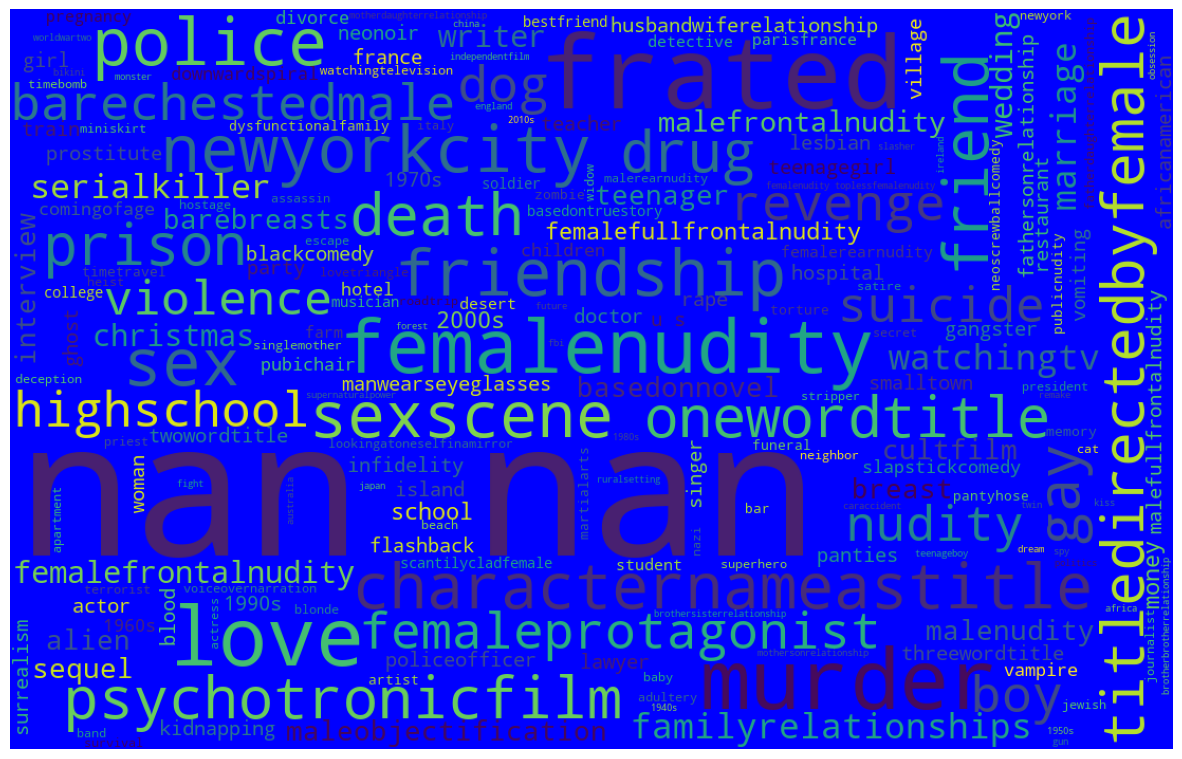

In [19]:
# create a wordcloud for plot_keywords

allwords = ' '.join( [ title for title in df_merge['plot_keywords']])

#custom_mask = np.array(Image.open('CLOUDZ.jpeg'))
wordCloud = WordCloud(background_color='blue', width=1100, height=700,random_state=42).generate(allwords)
plt.figure( figsize=(15,10) )
plt.axis('off')
plt.imshow(wordCloud)


---

__Observation and Interpretation:__



* There are many nan values within the dataset
* There are many keywords within the data, the most frequently appearing being those such as woman, female nudity, frontal nudity, murder, f rated, etc.
* This gives us insight on the most watched genre's



---

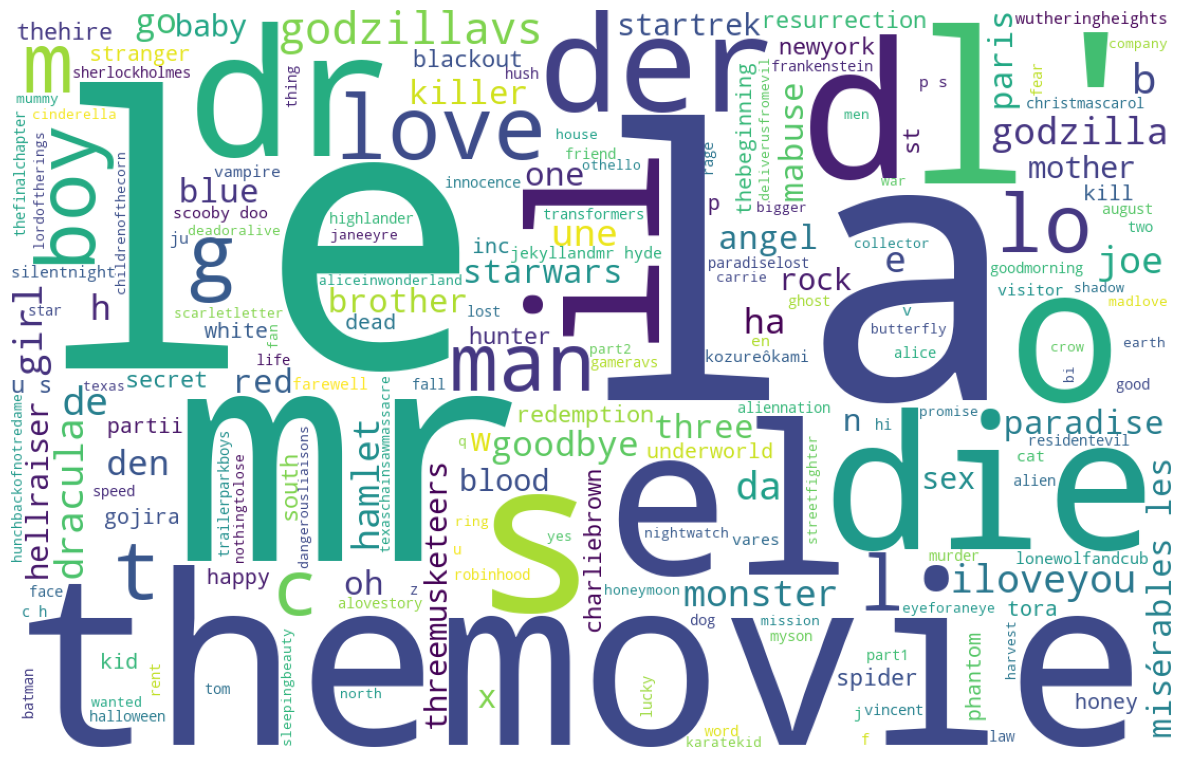

In [20]:
# create a wordcloud for 'title'

allwords = ' '.join( [ title for title in df_merge['title']])

#custom_mask = np.array(Image.open('CLOUDZ.jpeg'))
wordCloud = WordCloud(background_color='white', width=1100, height=700,random_state=42).generate(allwords)
plt.figure( figsize=(15,10) )
plt.axis('off')
plt.imshow(wordCloud)


---

__Observation and Interpretation:__



* The above wordcloud shows a depiction of the title feature.



---

In [21]:
year = df_merge['year']
movieId = df_merge['movieId']

Average rating in dataset: 3.5333951730983424


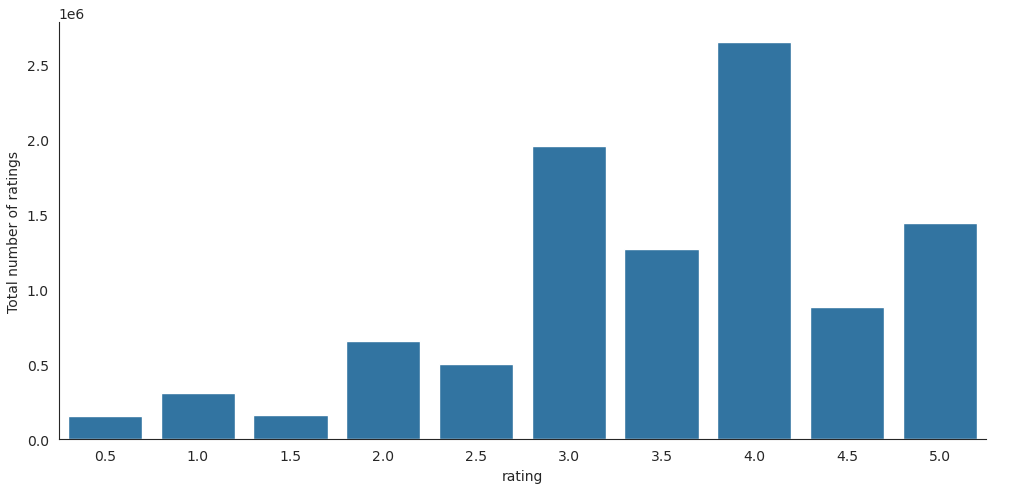

In [22]:
# creating a graph representing the total number of ratings for each category

with sns.axes_style('white'):
    g = sns.catplot(x="rating", data=df_train, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(df_train["rating"])}')

__Observation and Interpretation:__



* The average rating is 3.5
* The most movies are rated 4.0, followed by 3.0
* The range is from 0.5 to 5.0 as a rating 


Text(0, 0.5, 'Year Count')

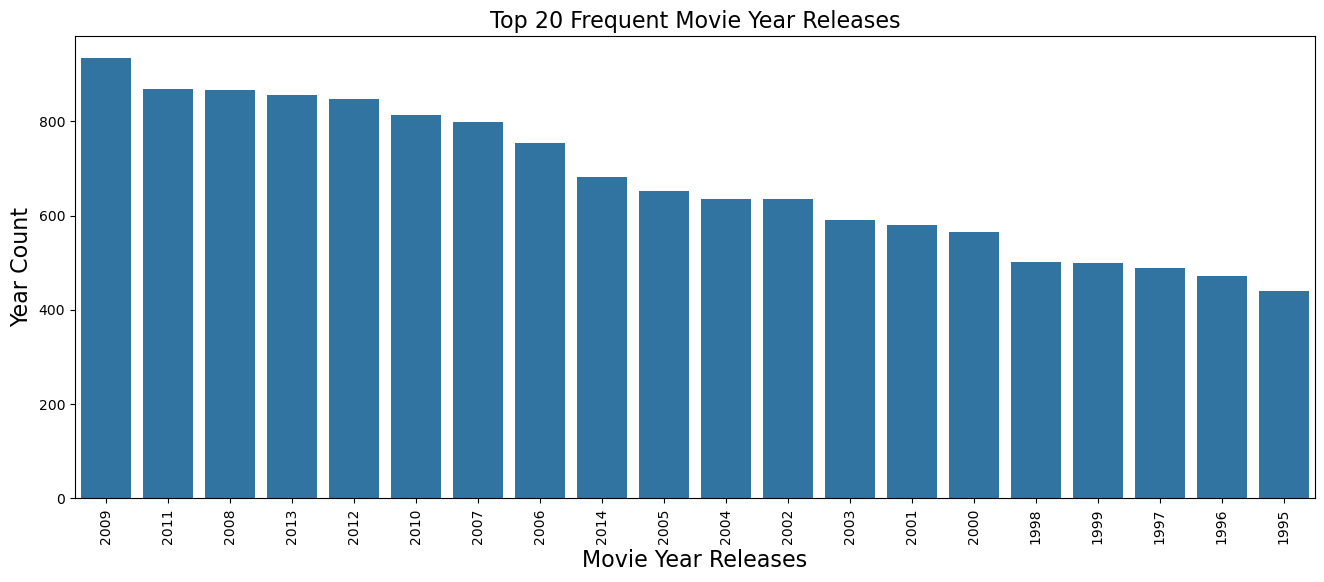

In [23]:
# creating a graph indicating the top 20 years with the most movie releases 
# 
plt.figure(figsize=(16,6))
sns.countplot(x='year', data=df_merge,order=df_merge['year'].value_counts().iloc[:20].index)
plt.title('Top 20 Frequent Movie Year Releases', fontsize=16)
plt.xticks(rotation=90)

#add axis labels
plt.xlabel('Movie Year Releases',fontsize=16)
plt.ylabel('Year Count',fontsize=16)


---

__Observation and Interpretation:__



* 2009 saw the most movies being released 
* 1995 saw the least movies being released 




---

Text(0, 0.5, 'Genre Count')

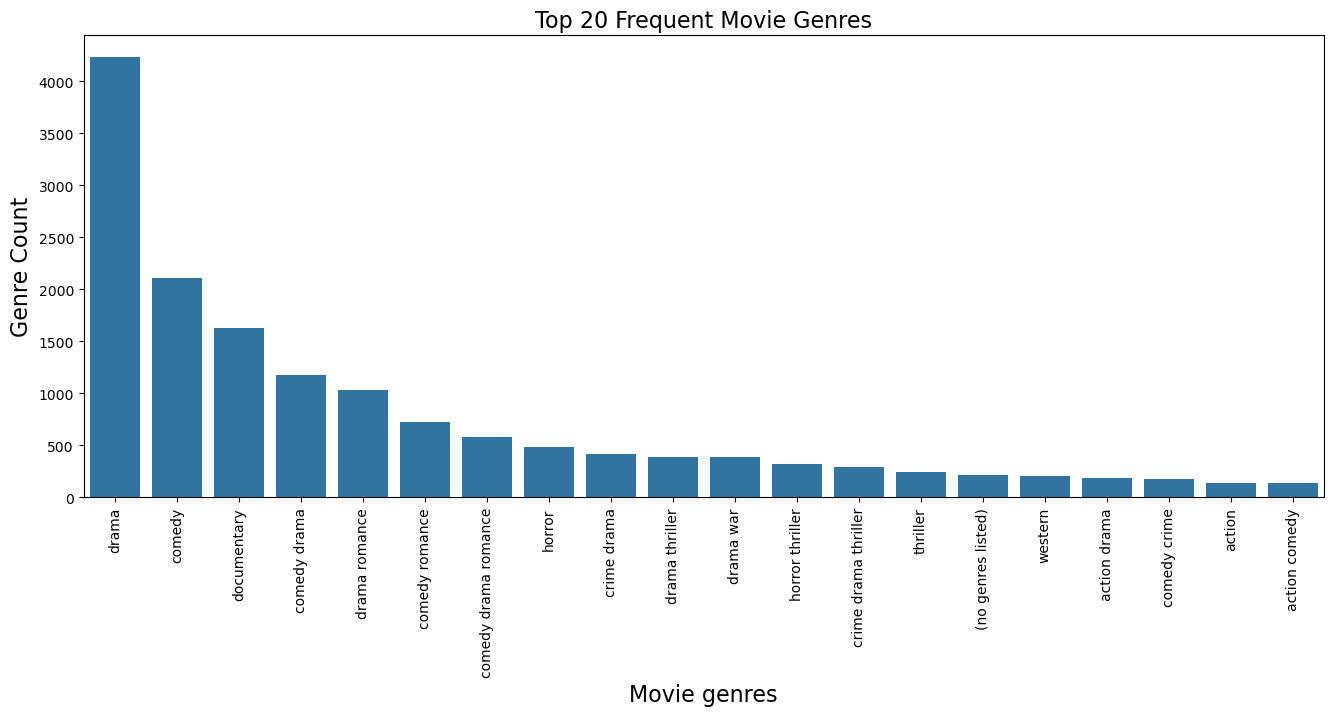

In [24]:
# creating a graph indicating the top 20 most frequently occuring movie genres

plt.figure(figsize=(16,6))
sns.countplot(x='genres', data=df_merge,order=df_merge['genres'].value_counts().iloc[:20].index)
plt.title('Top 20 Frequent Movie Genres', fontsize=16)
plt.xticks(rotation=90)

#add axis labels
plt.xlabel('Movie genres',fontsize=16)
plt.ylabel('Genre Count',fontsize=16)


---

__Observation and Interpretation:__



* The top appearing genre is drama, followed by comedy 
* The least appearing genre is action comedy 



---

<a id="five"></a>
## 5. Feature Engineering 
<a class="anchor" id="5"></a>
<a href=#cont>Back to Table of Contents</a>

In [25]:
# drop the timesmap features from the train and tag datasets as they are redundant in our data pre-processing 
df_train = df_train.drop(['timestamp'], axis=1)
df_tags = df_tags.drop(['timestamp'],axis=1)

In [26]:
#Remove dates in movie titles e.g transform "Toy Story(1995)"" to "Toy Story"
#df_merge['title'] = df_merge['title'].str.replace(to_replace=r'\(\d+\)', value=' ', regex=True).str.strip()
#df_merge['title'] = df_merge['title'].str.replace(r'\(\d+\)', ' ', regex=True).str.rstrip()
#df_merge['title'] = df_merge['title'].apply(lambda x: x.rstrip())
df_merge['title'] = df_merge['title'].str.replace(r'\(\d+\)', '', regex=True).str.strip()

In [27]:
df_merge.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,tomhankstimallendonrickles,johnlasseter,toy rivalry cowboy cgianimation,adventure animation children comedy fantasy,toystory,1995
1,2,robinwilliamsjonathanhydekirstendunst,jonathanhensleigh,boardgame adventurer fight game,adventure children fantasy,jumanji,1995
2,3,waltermatthaujacklemmonsophialoren,markstevenjohnson,boat lake neighbor rivalry,comedy romance,grumpieroldmen,1995
3,4,whitneyhoustonangelabassettlorettadevine,terrymcmillan,blackamerican husbandwiferelationship betrayal...,comedy drama romance,waitingtoexhale,1995
4,5,stevemartindianekeatonmartinshort,alberthackett,fatherhood doberman dog mansion,comedy,fatherofthebridepartii,1995


TF-IDF is a numerical representation of the importance of a word in a document. The term frequency (TF) measures how frequently a word appears in a document, while the inverse document frequency (IDF) measures the rarity of a word in a collection of documents. The combination of these two values results in a weight that reflects the importance of a word in a specific document within a larger collection of documents.


In [28]:
#Use TfidfVectorizer to convert text data into numerical data, which can then be used as input to various NLP models.
tfd_vect = TfidfVectorizer()

<a id="six"></a>
## 6. Modeling 
<a class="anchor" id="6"></a>
<a href=#cont>Back to Table of Contents</a>

### 6.1. CONTENT BASED FILTERING 

Content-based filtering is a recommendation system method that uses item features to recommend other items similar to what the user likes. It uses ccharacterists that the item has to recommend the next item For example, if a user has shown interest in articles about data science, a content-based filtering system will recommend other articles related to data science. Another example is if a user likes a movie that has comedy and has a high rating, then the recommendation system will suggest more comedy movies with high ratings.

![Example Image](content_based.png)

In [29]:
# fit the plot keywords from the df_merge dataset into the TfidfVectorizer to convert text to numerical data
vect_plot = tfd_vect.fit_transform(df_merge['plot_keywords'])

In [30]:
# we fit TF-IDF into cosine similarity to take advantage of the strengths of both methods and compare the similarity of documents based on the words they contain and their importance
cosine_sim = cosine_similarity(vect_plot)

#### Recommend movies based on a movie

In [31]:

def recommend_movies(title):
    # Find the index of the movie that matches the title
    indx = df_merge[df_merge['title'] == title].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[indx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df_merge['title'].iloc[movie_indices]

In [32]:
df_merge.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,tomhankstimallendonrickles,johnlasseter,toy rivalry cowboy cgianimation,adventure animation children comedy fantasy,toystory,1995
1,2,robinwilliamsjonathanhydekirstendunst,jonathanhensleigh,boardgame adventurer fight game,adventure children fantasy,jumanji,1995
2,3,waltermatthaujacklemmonsophialoren,markstevenjohnson,boat lake neighbor rivalry,comedy romance,grumpieroldmen,1995
3,4,whitneyhoustonangelabassettlorettadevine,terrymcmillan,blackamerican husbandwiferelationship betrayal...,comedy drama romance,waitingtoexhale,1995
4,5,stevemartindianekeatonmartinshort,alberthackett,fatherhood doberman dog mansion,comedy,fatherofthebridepartii,1995


In [33]:
# Example usage: this will display recommended movies after watching Jumanji

print(recommend_movies("jumanji"))

3384                           roadtoeldorado,the
9397                                     wordwars
18512          undertheboardwalk:themonopolystory
10398                                     zathura
1566                                     game,the
15635                                        glue
9281     springtimeinasmalltown(xiaochengzhichun)
14789                                wildhunt,the
23045                                   anotherme
24798                                   forgotten
Name: title, dtype: object


In [34]:
df_merge.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,tomhankstimallendonrickles,johnlasseter,toy rivalry cowboy cgianimation,adventure animation children comedy fantasy,toystory,1995
1,2,robinwilliamsjonathanhydekirstendunst,jonathanhensleigh,boardgame adventurer fight game,adventure children fantasy,jumanji,1995
2,3,waltermatthaujacklemmonsophialoren,markstevenjohnson,boat lake neighbor rivalry,comedy romance,grumpieroldmen,1995
3,4,whitneyhoustonangelabassettlorettadevine,terrymcmillan,blackamerican husbandwiferelationship betrayal...,comedy drama romance,waitingtoexhale,1995
4,5,stevemartindianekeatonmartinshort,alberthackett,fatherhood doberman dog mansion,comedy,fatherofthebridepartii,1995


#### Recommended movies in a given year

In [37]:
def recommend_year(year):
    # Find the index of the movie that matches the title
    idx = df_merge[df_merge['year'] == year].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df_merge['title'].iloc[movie_indices]

In [38]:
# Example usage: this will recommend movies around the same period of the movie previously watched

print(recommend_year('1995'))

3020                                      toystory2
18902    whowantstokilljessie?(kdochcezabítjessii?)
22786                              jinglealltheway2
14584                                    dalton,les
20909                           dug'sspecialmission
6823                                   bigempty,the
22144                             younggoetheinlove
14758                                     toystory3
24796                             ronalthebarbarian
9139                                 taboo(gohatto)
Name: title, dtype: object


### Collaborative based filtering 

Collaborative filtering is a technique for recommending items to users based on the interactions of users with similar preferences. By leveraging the behavior of users who have shown similar tastes, it provides personalized recommendations. For instance, if users A and B share similar movie preferences, and user B watches and enjoys a new movie, the system will suggest this movie to user A. There are two main types of collaborative filtering:

- `User-based collaborative filtering`: This method recommends items by finding users with similar preferences to the target user and suggesting items that they have liked or interacted with.

- `Item-based collaborative filtering`: This approach recommends items that are similar to those that the user has liked or interacted with in the past, based on the preferences of other users.

![Example Image](collabo.png)

In [39]:
# merge df_train and df_merge datasets

df_collab = pd.merge(df_train, df_merge, on='movieId')

In [40]:
df_collab.head()

,userId,movieId,rating,title_cast,director,plot_keywords,genres,title,year
0,5163,57669,4.0,elizabethberringtonrudyblommeolivierbonjour,martinmcdonagh,dwarf bruges irish hitman,comedy crime drama thriller,inbruges,2008
1,106343,5,4.5,stevemartindianekeatonmartinshort,alberthackett,fatherhood doberman dog mansion,comedy,fatherofthebridepartii,1995
2,146790,5459,5.0,tommyleejoneswillsmithriptorn,lowellcunningham,lingerie michaeljacksoncharacter shorthairedwo...,action comedy sci-fi,meninblackii(a.k.a.miib)(a.k.a.mib2),2002
3,106362,32296,2.0,sandrabullockreginakingenriquemurciano,marclawrence,femaleprotagonist cleavegag goodwoman fbi,adventure comedy crime,misscongeniality2:armedandfabulous,2005
4,9041,366,3.0,jeffdavisheatherlangenkampmikohughes,wescraven,freddykrueger elmstreet famousdirectorashimsel...,drama horror mystery thriller,wescraven'snewnightmare(nightmareonelmstreetpa...,1994


In [41]:
# drop redundant features in our new df_collab dataset 

df_collab = df_collab.drop(['title_cast','director','plot_keywords','genres','year'],axis=1)

In [42]:
df_collab.count()

userId     9633031
movieId    9633031
rating     9633031
title      9633031
dtype: int64

In [43]:
#work with the first 100000 rows as the original dataset is too large and causes computational complexity

df_collab = df_collab.iloc[0:100000]

In [44]:
#display the new dataset

df_collab.head()

,userId,movieId,rating,title
0,5163,57669,4.0,inbruges
1,106343,5,4.5,fatherofthebridepartii
2,146790,5459,5.0,meninblackii(a.k.a.miib)(a.k.a.mib2)
3,106362,32296,2.0,misscongeniality2:armedandfabulous
4,9041,366,3.0,wescraven'snewnightmare(nightmareonelmstreetpa...


In [45]:
# pivot table to group data by one or more variables and to summarize the data by calculating various aggregate functions such as sum, count, 
# and average.

utility_matrix = df_collab.pivot_table(index=['userId'],
                                       columns=['title'],
                                       values='rating')
utility_matrix.shape

(55309, 8657)

In [46]:
import scipy as sp

# Normalize each row (a given user's ratings) of the utility matrix

util_matrix_norm = utility_matrix.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

# Fill Nan values with 0's, transpose matrix, and drop users with no ratings

util_matrix_norm.fillna(0, inplace=True)
util_matrix_norm = util_matrix_norm.T
util_matrix_norm = util_matrix_norm.loc[:, (util_matrix_norm != 0).any(axis=0)]

# Save the utility matrix in scipy's sparse matrix format

util_matrix_sparse = sp.sparse.csr_matrix(util_matrix_norm.values)

In [47]:
# Compute the similarity matrix using the cosine similarity metric

user_similarity = cosine_similarity(util_matrix_sparse.T)

# Save the matrix as a dataframe to allow for easier indexing 
 
user_sim_df = pd.DataFrame(user_similarity,
                           index = util_matrix_norm.columns,
                           columns = util_matrix_norm.columns)

In [48]:
def collab_recommendations(user, N=10, k=20):
    # Cold-start problem - no ratings given by the reference user. 
    # With no further user data, we solve this by simply recommending
    # the top-N most popular books in the item catalog. 
    if user not in user_sim_df.columns:
        return df_collab.groupby('title').mean().sort_values(by='rating',
                                        ascending=False).index[:N].to_list()

    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    favorite_user_items = [] # <-- List of highest rated items gathered from the k users  
    most_common_favorites = {} # <-- Dictionary of highest rated items in common for the k users

    for i in sim_users:
        # Maximum rating given by the current user to an item 
        max_score = util_matrix_norm.loc[:, i].max()
        # Save the names of items maximally rated by the current user   
        favorite_user_items.append(util_matrix_norm[util_matrix_norm.loc[:, i]==max_score].index.tolist())

    # Loop over each user's favorite items and tally which ones are 
    # most popular overall.
    for item_collection in range(len(favorite_user_items)):
        for item in favorite_user_items[item_collection]:
            if item in most_common_favorites:
                most_common_favorites[item] += 1
            else:
                most_common_favorites[item] = 1
    # Sort the overall most popular items and return the top-N instances
    sorted_list = sorted(most_common_favorites.items(), key=operator.itemgetter(1), reverse=True)[:N]
    top_N = [x[0] for x in sorted_list]
    return top_N

#### Movies recommended to users (USER 5163)

In [49]:
collab_recommendations(5163)

['iamtryingtobreakyourheart',
 "tim'svermeer",
 'stormbreaker(alexrider:operationstormbreaker)',
 'byebyebirdie',
 'storieswetell',
 'angelofdeath',
 'whitenights',
 "plato'sacademy",
 'timeofthegypsies(domzavesanje)',
 'neversleepagain:theelmstreetlegacy']

### Modeling

In [50]:
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [51]:
# The Reader class is used to convert the input data into a Dataset object, which can then be used to train the recommendation system.
reader = Reader(rating_scale=(1, 5))

In [52]:
# code is used to load a pandas DataFrame into a Dataset object in the Surprise library that can be used to train the recommendation system.
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

In [53]:
# splitting the dataset into train and test

trainset, testset = train_test_split(data, test_size=0.25)

#### Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a powerful matrix factorization technique used in various applications, including recommendation systems, image processing, and data compression. It decomposes a matrix into three constituent matrices, enabling efficient analysis and manipulation of the original data.

In [54]:
# importing the model
from surprise import SVD

In [ ]:
# creating the model object 
algo = SVD()

# fitting the data 
algo.fit(data.build_full_trainset())

# making predictions 
predictions_algo = algo.test(testset)

#### Non-negeative Matrix Factorization (NMF)

**NMF (Non-negative Matrix Factorization)**: This algorithm is based on factorizing a matrix into two non-negative matrices. It is often used for item-based collaborative filtering.

In [ ]:
# importing the model 
from surprise import NMF

#creating the model object
algo_nmf = NMF()

# Train the model
algo_nmf.fit(trainset)

# Make predictions on the test set
predictions_nmf = algo_nmf.test(testset)

#### Co-clustering 


CoClustering: This algorithm is based on co-clustering of rows and columns in the ratings matrix. It is used for both item-based and user-based collaborative filtering.

In [ ]:
# importing the model
from surprise import CoClustering

# creating the model object
algo_co = CoClustering()

# Train the model
algo_co.fit(trainset)

# Make predictions on the test set
predictions_co = algo_co.test(testset)

<a id="seven"></a>
## 7. MODEL PERFORMANCE 
<a class="anchor" id="7"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
#import accuracy from surprise to measure accuracy
from surprise import accuracy

In [ ]:
# calculating the accuracy of each model based on the RMSE score 

accuracy.rmse(predictions_algo)
accuracy.rmse(predictions_nmf)
accuracy.rmse(predictions_co)

#### Below , we plot results of each Model's RMSE in a bar graph

In [ ]:
data = {'SVD':0.6630, 'NMF':0.8842, 'Co-Clustering':0.8973}
models_md = list(data.keys())
values_md = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models_md, values_md, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("RMSE of Each Model. The Lower the RMSE,the better the model accurary")
plt.show()

<a id="eight"></a>
## Model Explaination
<a class="anchor" id="8"></a>
<a href=#cont>Back to Table of Contents</a>

For the Recommendation system , the team used 3 models SVD (Singular Value Decomposition) , NMF (Non-negative Matrix Factorization) and Co-Clustering.

* The Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations

* NMF (Non-negative Matrix Factorization): This algorithm is based on factorizing a matrix into two non-negative matrices. It is often used for item-based collaborative filtering.

* CoClustering: This algorithm is based on co-clustering of rows and columns in the ratings matrix. It is used for both item-based and user-based collaborative filtering.


These are several models that can handle large datasets with over 10 million rows for the movie recommendation systems. After testing and running each model, the next step was to measure each model's prediction accuracy using RMSE. Root Mean Squared Error (RMSE) is a measure of the difference between predicted and actual values. It is commonly used in regression problems to evaluate the performance of a model.The RMSE is calculated as the square root of the mean of the squared differences between the predicted and actual values.The smaller the RMSE, the better the model's predictions.
The SVD model had RSME score of **0.6630** , NMF model had score of **0.8842** and Co Clustering had RSME score of **0.8973** . The scores showed the optimal model to use which was the **SVD Model**  

<a id="nine"></a>
## Conclusion
<a class="anchor" id="9"></a>
<a href=#cont>Back to Table of Contents</a>

In today's fast-paced world, time is a precious commodity. During short breaks to refresh the mind, people often turn to options that are just a click away. What could be more convenient than being recommended your favorite movie? This algorithm is designed with user convenience in mind, aiming to enhance the movie-watching experience by predicting ratings for unseen movies with minimal error compared to other tested models.

The SVD Model stands out for its ability to accurately predict how a user would rate a movie they haven't watched yet, suggesting films that align closely with their preferences. This personalized approach not only streamlines decision-making but also reduces mundane tasks, offering a tailored selection that encourages exploration and enhances the overall viewing experience.

Implementing such a model not only improves user satisfaction and engagement by providing quick and easy movie suggestions but also boosts consumption rates, potentially increasing profitability. Furthermore, it generates valuable insights into consumer preferences, which can inform targeted marketing strategies and business models.

In today's tech-driven landscape, prioritizing convenience can set businesses apart, offering competitive advantages and unique selling propositions that resonate with modern consumers. By leveraging advanced algorithms like SVD, businesses can elevate customer experience and drive growth in a rapidly evolving market.